## Capstone Project - Predicting content quality and popularity for streaming services

by Arjun Lokur

This capstone project aims to predict the quality and popularity for a movie or TV show, based on inputting key features incuding who's starring in it, a brief summary of the plot, the genres etc. The intent being to help a streaming platform to decide whether it would be worth it to greenlight a new piece of content, or acquire one to host on their platform. The quality and popularity here being measured by IMDB rating, and number of IMDB votes respectively.

### Data Dictionary

I've started out with 8 different datasets. This is because I was able to get the data for 4 different streaming services:
1) Netflix <br>
2) Amazon Prime Video <br>
3) HBO Max <br>
4) Disney Plus <br>

And then each service has 2 datasets each, which is the titles (movie/TV show) on each streaming service, and then the credits for each of those titles.

I'm initially going to combine all the titles into a dataset called **all_titles** and all the credits into one called 
**all_credits**. The data dictionary for these 2 datasets is as follows:

|          Feature Name          |                                                    Explanation                                                    |
|:------------------------------:|:-----------------------------------------------------------------------------------------------------------------:|
|               id               | This is the unique identifier for that content title.  This is the column on which we can join the credits table. |
|              title             |                                              The name of the content                                              |
|              type              |                                         Whether it's a movie or a TV show                                         |
|           description          |            A short description about this movie/TV show.  Essentially a plot summary without spoilers.            |
|          release_year          |                                         The year this content was released                                        |
|        age_certification       |                      The age certification, ranging from G (General Audience) to R (R-rated)                      |
|             runtime            |                             The length of the movie in minutes (also knows as runtime)                            |
|      production_countries      |                                    The country or countries it was produced in                                    |
|             seasons            |                                       How many seasons it has (for TV shows)                                      |
|             imdb_id            |                                   Another identifier column, it's the id on IMDB                                  |
|           imdb_score           |            The rating on IMDB. This is one of our target columns,  and a proxy for the content quality.           |
|           imdb_votes           |             Our other target columns - How many people voted  for it on IMDB. A proxy for popularity.             |
| tmdb_popularity and tmdb_score |            Similar metrics for another ratings platform TMDB.  Not important as I'll be dropping these.           |
|            platform            |           Which platform the content is coming from, as I'm  combining content for 4 different platforms          |

### Part 1 : Cleaning, EDA and Pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing the data for Netflix first, with the titles and the credits (meaning the actors and director) being in seperate csv files

netflix_titles = pd.read_csv('data/netflix_titles.csv')

In [3]:
netflix_titles['platform'] = 'netflix'

In [211]:
netflix_titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN,netflix
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,netflix
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300,netflix
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811,netflix
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600,netflix


In [5]:
netflix_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
 15  platform             

I'm going to combine all the streaming titles into one csv file before cleaning it.

In [6]:
#now importing the credits for netflix

netflix_credits = pd.read_csv('data/netflix_credits.csv')

In [7]:
netflix_credits.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


We can see that this file has the entire cast for a movie/tv show on Netflix. We can join these tables as they both share a column 'id' which is a unique identifier for a given piece of content. For example, the id 'tm84618' refers to the movie Taxi Driver.

In [8]:
#netflix = pd.merge(netflix_titles, netflix_credits)

In [9]:
#netflix.info()

In [10]:
netflix_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
 15  platform             

In [11]:
#netflix.head()

In [12]:
#Checking who the top actors/directors are on Netflix by number of movies

netflix_credits.groupby(netflix_credits['name'])["id"].count().sort_values(ascending=False).reset_index().head()

,name,id
0,Boman Irani,25
1,Kareena Kapoor Khan,25
2,Shah Rukh Khan,23
3,Takahiro Sakurai,21
4,Raúl Campos,20


In [13]:
#Now creating the dataframes for all the other streaming sevices one by one
#First up HBOmax

hbo_titles = pd.read_csv('data/hbo_titles.csv')
hbo_credits = pd.read_csv('data/hbo_credits.csv')
hbo_titles['platform'] = 'hbo'
#hbo = pd.merge(hbo_titles, hbo_credits)

In [14]:
#Disneyplus
disney_titles = pd.read_csv('data/disney_titles.csv')
disney_credits = pd.read_csv('data/disney_credits.csv')
disney_titles['platform'] = 'disney'
#disney = pd.merge(disney_titles, disney_credits)

In [15]:
#Amazon Prime video
prime_titles = pd.read_csv('data/prime_titles.csv')
prime_credits = pd.read_csv('data/prime_credits.csv')
prime_titles['platform'] = 'prime'
#prime = pd.merge(prime_titles, prime_credits)

In [222]:
#Combining all the titles into one dataframe, and all the credits into one dataframe

all_titles = pd.concat([netflix_titles,hbo_titles,disney_titles,prime_titles])

In [212]:
all_credits = pd.concat([netflix_credits,hbo_credits,disney_credits,prime_credits])

In [213]:
#Checking for duplicates in all_credits

all_credits.duplicated().sum()

4524

The reason that all_credits has duplicates is that a few titles on all_titles are being repeated, because the some movie/TV show is sometimes available on multiple platforms. 

This will complicate things later during feature engineering, so let's drop the duplicates, both on all_titles and all_credits.

In [223]:
all_titles[all_titles['id'].duplicated()]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform
220,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"['thriller', 'crime', 'action']",['US'],NaN,tt0066999,7.7,153463.0,14.745,7.5,hbo
249,tm119281,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker fal...",1967,R,110,"['drama', 'crime', 'action']",['US'],NaN,tt0061418,7.7,111189.0,15.309,7.5,hbo
252,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,145,"['action', 'war']","['US', 'GB']",NaN,tt0061578,7.7,71921.0,17.718,7.6,hbo
531,tm155787,GoodFellas,MOVIE,"The true story of Henry Hill, a half-Irish, ha...",1990,R,146,"['drama', 'crime']",['US'],NaN,tt0099685,8.7,1113695.0,31.153,8.5,hbo
537,tm138875,When Harry Met Sally...,MOVIE,"During their travel from Chicago to New York, ...",1989,R,96,"['romance', 'comedy', 'drama']",['US'],NaN,tt0098635,7.7,212913.0,16.005,7.4,hbo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8833,tm869307,Three Thieves,MOVIE,"Due to a case of mistaken identity, three diss...",2019,NaN,108,['comedy'],['NG'],NaN,tt11133472,NaN,NaN,0.944,NaN,prime
9009,tm1000619,Radhe Shyam,MOVIE,"Vikramaditya, a world-renowned palmist, believ...",2022,NaN,138,"['romance', 'drama']",['IN'],NaN,tt8960382,6.9,21328.0,9.770,5.4,prime
9248,ts273461,Word of Honor,SHOW,Zhou Zi Shu gets embroiled in a conspiracy in ...,2021,TV-14,43,"['action', 'scifi']",['CN'],1.0,NaN,NaN,NaN,40.681,8.8,prime
9282,tm1022912,One,MOVIE,"Story of Kadakkal Chandran, the Chief Minister...",2021,NaN,151,"['drama', 'thriller']",['IN'],NaN,tt11286552,6.5,2672.0,2.124,6.6,prime


So there are 237 duplicates in all_titles.

In [ ]:
#Dropping duplicates for all_titles

all_titles = all_titles.drop_duplicates(subset='id', keep='first')

In [214]:
#Dropping duplicates for all_credits

all_credits.drop_duplicates(inplace=True)

In [215]:
#Checking to see if it worked

all_credits.duplicated().sum()

0

In [205]:
all_titles.shape

(20550, 16)

In [17]:
#Checking for the null values in ther titles dataframe

all_titles.isna().sum()/len(all_titles) * 100

id                       0.000000
title                    0.004866
type                     0.000000
description              0.754258
release_year             0.000000
age_certification       51.771290
runtime                  0.000000
genres                   0.000000
production_countries     0.000000
seasons                 77.450122
imdb_id                  8.749392
imdb_score              11.201946
imdb_votes              11.396594
tmdb_popularity          3.318735
tmdb_score              13.479319
platform                 0.000000
dtype: float64

We need the IMDB score and votes as this is going to be our target column. 11% of the dataset isn't ideal but I'm choosing to drop these rows instead of scraping to get the values from IMDB which may take up a lot of time.

First let's make sure that it's the same rows that have both IMDB score and votes missing.

In [18]:
len(all_titles[all_titles['imdb_score'].isna() & all_titles['imdb_votes'].isna()])/len(all_titles) * 100

11.201946472019465

It's the same rows, and there may be some extra rows that have the imdb_votes missing. However, as a last option before I drop it, let's check if the tmdb scores and popularity columns have anything useful. TMDB is another website that is like an alternative to IMDB, it also scores movies and TV shows on quality and popularity, based on user votes.

In [19]:
all_titles[['title','tmdb_popularity']].sort_values(by = 'tmdb_popularity',ascending=False).head(20)

,title,tmdb_popularity
1364,Moon Knight,9323.832
2974,The Batman,4447.894
1368,Turning Red,2331.811
907,Doctor Strange,2286.312
4707,Incantation,2274.044
1123,Stranger Things,2226.231
4702,The Sea Beast,1723.363
4714,Valley of the Dead,1668.296
4696,The Man from Toronto,1439.906
8934,All the Old Knives,1437.906


Something seems off here. Out of all the movies and TV shows that exist on streaming, these are the most popular? The no. 1, Moon Knight was a decidedly mixed bag TV show offering from Marvel Studios that had a lukewarm response from viewers. And are movies like 'The Batman' and 'Doctor Strange' really more popular than say 'The Dark Knight' and 'Titanic'? Let's look at the TMDB scores next.

In [20]:
all_titles[['title','tmdb_score']].sort_values(by = 'tmdb_score',ascending=False).head(20)

,title,tmdb_score
8892,Flying Tiger II,10.0
5634,Breaded Life,10.0
3223,Celebrity Paranormal Project,10.0
9406,Making Their Mark,10.0
2812,The Not-Too-Late Show with Elmo,10.0
3224,Mr Harvey Lights a Candle,10.0
5671,The Big Shot Game Show,10.0
1320,Calling All T.O.T.S.,10.0
1307,Disney Junior Music Lullabies,10.0
5574,Senzo: Murder of a Soccer Star,10.0


These seem geared towards kids content as the highest scoring entries.

All of which is to say, these tmdb columns don't make a lot of sense, and I certainly can't use them to fill in my missing IMDB values. I'll be dropping the TMDB columns entirely.

In [21]:
#Dropping the rows with null values for imdb score and votes

all_titles.dropna(subset=['imdb_score', 'imdb_votes'], how='all', inplace=True)

And because there are slightly more null values in the IMDB votes column, we need to drop the remaining null values too.

In [22]:
all_titles.dropna(subset=['imdb_votes'], how='all', inplace=True)

In [23]:
#Dropping the tmdb columns entirely.

all_titles.drop(columns=['tmdb_score', 'tmdb_popularity'],inplace=True)

In [24]:
#Checking for the null values in ther titles dataframe

all_titles.isna().sum()/len(all_titles) * 100

id                       0.000000
title                    0.000000
type                     0.000000
description              0.208699
release_year             0.000000
age_certification       49.879174
runtime                  0.000000
genres                   0.000000
production_countries     0.000000
seasons                 77.191344
imdb_id                  0.000000
imdb_score               0.000000
imdb_votes               0.000000
platform                 0.000000
dtype: float64

Looking at the `age_certification` column in more detail

Row with the max runtime for the full DataFrame:


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform
5227,ts320075,Aranyak,SHOW,After a foreign teenage tourist goes missing i...,2021,TV-MA,43,"['thriller', 'drama', 'crime']",['IN'],1.0,tt14167344,7.9,7629.0,4.389,7.7,netflix
5227,tm562713,9 Hours,MOVIE,A fashion film. A couple spend 9 hours togethe...,2014,NaN,549,['european'],['DK'],NaN,tt4656672,NaN,NaN,NaN,NaN,prime


In [25]:
all_titles.shape

(18208, 14)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform
515,ts19384,A Lion in the House,SHOW,Five families struggle with the ups and downs ...,2006,TV-14,190,['documentation'],['US'],1.0,NaN,NaN,NaN,1.487,7.5,netflix
515,tm37990,First Man into Space,MOVIE,The first pilot to leave Earth's atmosphere la...,1959,NaN,77,"['drama', 'horror', 'scifi']",['GB'],NaN,tt0052805,5.4,1468.0,2.358,5.0,hbo
515,tm83783,The Game Plan,MOVIE,Bachelor football star Joe Kingman seems to ha...,2007,PG,110,"['comedy', 'family', 'sport']",['US'],NaN,tt0492956,6.1,65355.0,32.946,6.4,disney
515,tm114757,Lucky Terror,MOVIE,A sharpshooter in a traveling sideshow is fals...,1936,NaN,61,"['western', 'comedy', 'action']",['US'],NaN,tt0027917,6.0,71.0,0.840,5.0,prime


In [26]:
all_titles.isna().sum()

id                          0
title                       0
type                        0
description                38
release_year                0
age_certification        9082
runtime                     0
genres                      0
production_countries        0
seasons                 14055
imdb_id                     0
imdb_score                  0
imdb_votes                  0
platform                    0
dtype: int64

<AxesSubplot: >

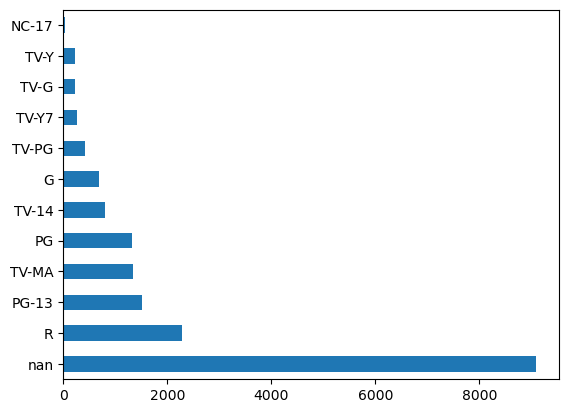

In [27]:
all_titles['age_certification'].value_counts(dropna=False).plot(kind='barh')

With 51% null values, it doesn't make sense to try and fill them up using the remaining values, so I'm just going to drop this column.

In [28]:
all_titles.drop(columns=['age_certification'],inplace=True)

The seasons column has a high number of nulls because that indicates the % of movies in the dataframe vs TV shows. We can replace the null values in this column with 0 (as movies don't have seasons).

In [ ]:
all_titles['seasons'].fillna(0, inplace=True)

## Feature engineering - extracting actor value information from the Credits table

What I've observed about the credits table is the actors for each title are listed in order of importance to the movie, in other words, how big of a role they play in the movie. Typically the more famous the actor, the higher the ranking in the credits table (for each movie) they are going to be.

So the key intent in this feature engineering is to extract the mean rank, without outliers, and then combine it with the number of titles someone has appeared in.

**Why remove outliers?** <br>
As you'll see further below, even superstars sometimes appear quite low on the rank list, if they have a cameo appearance or it's a documentary with many stars or some such unusual occurrence. And if someone has mostly been rank 1 but is suddenly rank 48 in something, that can throw off the mean completely.

**Why not mode instead of mean?** <br>
This is intended to not confuse character actors (who might be prolific in the number of projects they appear in) as superstars. What I mean is, there are some actors who might frequently appear as rank 1 or 2 in smaller productions, and who do a lot of movies, when they not in the top 5 ranks when they appear in a big production. Think of character actors like Steve Buscemi, Joe Pesci etc. Definitely great supporting actors but not superstars.

**What's the advantage of combining it with the number of titles?** <br>
If I don't use this information, that is - how many titles a particular actor shows up in, then the highest ranked actors will be those who only appeared in 1 or 2 movies as the 1st rank. Think small time documentary films or independently released movies. 

So the intent is to **divide the total number of titles with mean rank (without outliers) to get an actor's value, and then bin it**. It's not a perfect method, but it's the best way to extract this information.


In [224]:
#This code assigns a rank to the cast in the order in which they appear in the listing for each movie-role combo.
#Meaning the Taxi Driver - Actor is one combo (De Niro is first) and then Taxi Driver - Director is another combo...
#(Scorsese is first)

all_credits['rank'] = (all_credits.groupby(['id','role']).cumcount()+1)


In [227]:
all_credits.head()

,person_id,id,name,character,role,rank
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR,1
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR,2
2,7064,tm84618,Albert Brooks,Tom,ACTOR,3
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR,4
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR,5


In [333]:
all_credits[all_credits['name'] == 'Leonardo DiCaprio']

,person_id,id,name,character,role,rank
2089,1641,tm191110,Leonardo DiCaprio,Jack Dawson,ACTOR,2
2553,1641,tm11556,Leonardo DiCaprio,Fee Herod 'The Kid',ACTOR,4
4637,1641,tm111828,Leonardo DiCaprio,Frank Abagnale Jr.,ACTOR,1
4942,1641,tm92641,Leonardo DiCaprio,Dom Cobb,ACTOR,1
4992,1641,tm27911,Leonardo DiCaprio,"William ""Billy"" Costigan, Jr.",ACTOR,2
6938,1641,tm32919,Leonardo DiCaprio,Danny Archer,ACTOR,1
12829,1641,tm41792,Leonardo DiCaprio,Calvin J. Candie,ACTOR,3
64647,1641,tm856378,Leonardo DiCaprio,Dr. Randall Mindy,ACTOR,2
20206,1641,tm109186,Leonardo DiCaprio,Romeo,ACTOR,1
31381,1641,tm86637,Leonardo DiCaprio,Howard Hughes,ACTOR,1


In [35]:
#function to return the mean without outliers


def mean_without_outliers(data, multiplier=1.5):
    """
    Calculates the mean of a pandas Series after removing outliers.

    Args:
        data (pandas.Series): A pandas Series of numerical data.
        multiplier (float): A multiplier used to adjust the strictness of outlier identification. Default is 1.5.

    Returns:
        float: The mean of the data after removing outliers.

    Raises:
        TypeError: If the data input is not a pandas Series.
        ValueError: If the data input is empty.
    """

    if not isinstance(data, pd.Series):
        raise TypeError("Data must be a pandas Series.")
    if data.empty:
        raise ValueError("Data Series cannot be empty.")
    
    q1 = np.quantile(data, 0.25)
    q3 = np.quantile(data, 0.75)
    iqr = q3 - q1
    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    return filtered_data.mean()




In [264]:

multiplier = 0.5
mean_without_outliers = lambda s: s[(s >= np.quantile(s, 0.25) - multiplier * \
                                     (np.quantile(s, 0.75) - np.quantile(s, 0.25))) & 
                                    (s <= np.quantile(s, 0.75) + multiplier * \
                                     (np.quantile(s, 0.75) - np.quantile(s, 0.25)))].mean()

result = all_credits[all_credits['role'] == 'ACTOR'].groupby('name')['rank'].\ #We don't need the mean rank for Directors
apply(mean_without_outliers).reset_index()


In [265]:
#Checking a few results

result[result['name'] == 'Robert De Niro']

,name,rank
114829,Robert De Niro,1.772727


In [266]:
result[result['name'] == 'Leonardo DiCaprio']

,name,rank
81082,Leonardo DiCaprio,1.230769


In [267]:
result = result.rename(columns={'rank':'mean_rank_without_outliers'})

In [293]:
merged_df = pd.merge(all_credits, result, on='name', how='outer')

In [294]:
merged_df.isna().sum()

person_id                         0
id                                0
name                              0
character                     31922
role                              0
rank                              0
mean_rank_without_outliers    12549
dtype: int64

The null values in mean_rank without outliers now is the Directors. Having the null values here might complicate things later on - I'm going to fill this in with a high value for the mean rank (100).

In [295]:
merged_df['mean_rank_without_outliers'].fillna(value = 100, inplace=True)

In [274]:
merged_df.isna().sum()

person_id                         0
id                                0
name                              0
character                     31922
role                              0
rank                              0
mean_rank_without_outliers        0
dtype: int64

The character null values are I think also indicating the Directors. Let's have a look.

In [253]:
merged_df[merged_df['character'].isna() & (merged_df['role'] != 'DIRECTOR')]

,person_id,id,name,character,role,rank,mean_rank_without_outliers
122,3308,tm28143,Martin Scorsese,NaN,ACTOR,15,4.080000
246,6639,tm329262,Ned Beatty,NaN,ACTOR,1,4.562500
304,11472,ts29199,Graham Chapman,NaN,ACTOR,1,1.000000
314,1549,ts29199,John Cleese,NaN,ACTOR,2,4.156250
350,11474,ts29199,Eric Idle,NaN,ACTOR,5,3.789474
...,...,...,...,...,...,...,...
290290,1410766,ts273173,Yu Kaining,NaN,ACTOR,10,10.000000
290291,1280968,ts273173,Wu Heng,NaN,ACTOR,11,11.000000
290294,241554,tm1049635,Nandamuri Taraka Ratna,NaN,ACTOR,1,1.000000
290295,1222219,tm1049635,Suresh Kondeti,NaN,ACTOR,2,2.000000


So that wasn't true, we do see some instances where the character name simply isn't known. Not important as we don't really need the character name anyway.

Interesting though that Martin Scorsese is showing up here as an actor as well. This might affect what his mean_rank is - and it will be similar for those Directors who also show up in this list as Actors. Let's have a look.

In [282]:
merged_df[(merged_df['role'] == 'DIRECTOR') & (merged_df['mean_rank_without_outliers'] < 100)]

,person_id,id,name,character,role,rank,mean_rank_without_outliers,count_of_titles
97,3308,tm84618,Martin Scorsese,NaN,DIRECTOR,1,15.6,31
98,3308,tm155787,Martin Scorsese,NaN,DIRECTOR,1,15.6,31
99,3308,tm27911,Martin Scorsese,NaN,DIRECTOR,1,15.6,31
101,3308,tm186461,Martin Scorsese,NaN,DIRECTOR,1,15.6,31
103,3308,tm244149,Martin Scorsese,NaN,DIRECTOR,1,15.6,31
...,...,...,...,...,...,...,...,...
290264,2024134,tm1088712,Michael Munn,NaN,DIRECTOR,1,9.0,2
290278,238482,tm1019060,Gokul,NaN,DIRECTOR,1,4.0,2
290303,2088979,tm1078263,Nikki H. Royal,NaN,DIRECTOR,1,6.0,2
290309,2084915,tm1079144,Jay Nog,NaN,DIRECTOR,1,1.0,2


In [283]:
#Looking at one example in particular

merged_df[merged_df['name'] == 'Michael Munn']

,person_id,id,name,character,role,rank,mean_rank_without_outliers,count_of_titles
290263,516174,tm1088712,Michael Munn,Sutton,ACTOR,9,9.0,2
290264,2024134,tm1088712,Michael Munn,NaN,DIRECTOR,1,9.0,2


I think this is okay. If the person has appeared as both an actor and a director, their mean_rank as an actor takes precedence. We don't want to exclude a superstar actor just because they've been a director - think of Ben Affleck directing Argo as an example.

In [296]:
all_credits_new = merged_df

,person_id,id,name,character,role,mean_rank_without_outliers
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR,1.772727
1,3748,tm155787,Robert De Niro,James Conway,ACTOR,1.772727
2,3748,tm180542,Robert De Niro,David 'Noodles' Aaronson,ACTOR,1.772727
3,3748,tm145608,Robert De Niro,Leonard Lowe,ACTOR,1.772727
4,3748,tm311902,Robert De Niro,Himself (Uncredited),ACTOR,1.772727
...,...,...,...,...,...,...
294836,1938589,tm1054116,Sangam Shukla,Madhav,ACTOR,1.000000
294837,1938565,tm1054116,Vijay Thakur,Sanjay Thakur,ACTOR,2.000000
294838,728899,tm1054116,Vanya Wellens,Budhiya,ACTOR,3.000000
294839,1938620,tm1054116,Vishwa Bhanu,Gissu,ACTOR,4.000000


Now, let's add in the count of titles information, which is key to getting the 'value' column.

In [297]:
title_count = all_credits_new.groupby('name')['id'].count().reset_index()

In [298]:
title_count.rename(columns={'id':'count_of_titles'}, inplace=True)

In [299]:
merged_df = pd.merge(all_credits_new, title_count, on = 'name')

In [300]:
merged_df

,person_id,id,name,character,role,rank,mean_rank_without_outliers,count_of_titles
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR,1,1.772727,28
1,3748,tm155787,Robert De Niro,James Conway,ACTOR,2,1.772727,28
2,3748,tm180542,Robert De Niro,David 'Noodles' Aaronson,ACTOR,1,1.772727,28
3,3748,tm145608,Robert De Niro,Leonard Lowe,ACTOR,1,1.772727,28
4,3748,tm311902,Robert De Niro,Himself (Uncredited),ACTOR,3,1.772727,28
...,...,...,...,...,...,...,...,...
290312,1938589,tm1054116,Sangam Shukla,Madhav,ACTOR,1,1.000000,1
290313,1938565,tm1054116,Vijay Thakur,Sanjay Thakur,ACTOR,2,2.000000,1
290314,728899,tm1054116,Vanya Wellens,Budhiya,ACTOR,3,3.000000,1
290315,1938620,tm1054116,Vishwa Bhanu,Gissu,ACTOR,4,4.000000,2


In [301]:
#This is our equation to extract the value.

merged_df['value'] = merged_df['count_of_titles']/(merged_df['mean_rank_without_outliers'])

In [302]:
merged_df

,person_id,id,name,character,role,rank,mean_rank_without_outliers,count_of_titles,value
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR,1,1.772727,28,15.794872
1,3748,tm155787,Robert De Niro,James Conway,ACTOR,2,1.772727,28,15.794872
2,3748,tm180542,Robert De Niro,David 'Noodles' Aaronson,ACTOR,1,1.772727,28,15.794872
3,3748,tm145608,Robert De Niro,Leonard Lowe,ACTOR,1,1.772727,28,15.794872
4,3748,tm311902,Robert De Niro,Himself (Uncredited),ACTOR,3,1.772727,28,15.794872
...,...,...,...,...,...,...,...,...,...
290312,1938589,tm1054116,Sangam Shukla,Madhav,ACTOR,1,1.000000,1,1.000000
290313,1938565,tm1054116,Vijay Thakur,Sanjay Thakur,ACTOR,2,2.000000,1,0.500000
290314,728899,tm1054116,Vanya Wellens,Budhiya,ACTOR,3,3.000000,1,0.333333
290315,1938620,tm1054116,Vishwa Bhanu,Gissu,ACTOR,4,4.000000,2,0.500000


In [303]:
list_of_values = merged_df[merged_df['role'] == 'ACTOR'].\
groupby(['name','role'])['value'].max().reset_index().\
sort_values(by='value',ascending=False)

Let's look at who the top names by value are

In [ ]:
list_of_values.sort_values(by='value', ascending=False).head(30)

And now let's look at what the appropriate value for creating bins might be.

In [304]:
list_of_values.describe()

,value
count,144178.000000
mean,0.319116
std,0.823894
min,0.003195
25%,0.047619
50%,0.102564
75%,0.266667
max,46.000000


In [321]:
list_of_values[list_of_values['value'] >= 13].count()

name     71
role     71
value    71
dtype: int64

In [327]:
list_of_values[list_of_values['value'] == 13]

,name,role,value
63421,Jet Li,ACTOR,13.0
81082,Leonardo DiCaprio,ACTOR,13.0
51972,Hayao Miyazaki,ACTOR,13.0
83818,Louis Koo,ACTOR,13.0
95501,Michela Luci,ACTOR,13.0


In [316]:
list_of_values[list_of_values['value'] >= 9].count()

name     205
role     205
value    205
dtype: int64

In [319]:
list_of_values[list_of_values['value'] >= 4.5].count()

name     834
role     834
value    834
dtype: int64

Let's have a look at the distribution of the values

In [328]:
import seaborn as sns

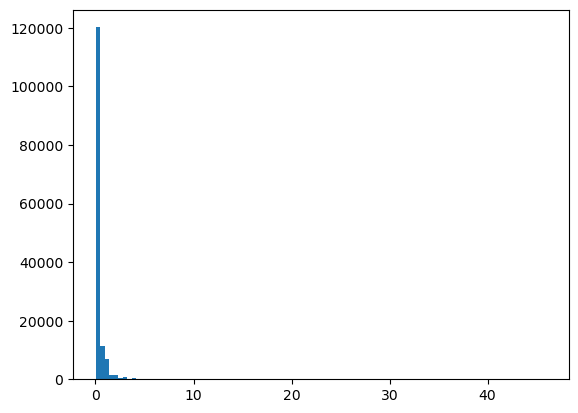

In [329]:
plt.hist(list_of_values['value'], bins = 100)
plt.show()

So most of the values are very close to 0. This is as expected - you have very few superstars but lots of role playing actors.

In [334]:
merged_df

,person_id,id,name,character,role,rank,mean_rank_without_outliers,count_of_titles,value
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR,1,1.772727,28,15.794872
1,3748,tm155787,Robert De Niro,James Conway,ACTOR,2,1.772727,28,15.794872
2,3748,tm180542,Robert De Niro,David 'Noodles' Aaronson,ACTOR,1,1.772727,28,15.794872
3,3748,tm145608,Robert De Niro,Leonard Lowe,ACTOR,1,1.772727,28,15.794872
4,3748,tm311902,Robert De Niro,Himself (Uncredited),ACTOR,3,1.772727,28,15.794872
...,...,...,...,...,...,...,...,...,...
290312,1938589,tm1054116,Sangam Shukla,Madhav,ACTOR,1,1.000000,1,1.000000
290313,1938565,tm1054116,Vijay Thakur,Sanjay Thakur,ACTOR,2,2.000000,1,0.500000
290314,728899,tm1054116,Vanya Wellens,Budhiya,ACTOR,3,3.000000,1,0.333333
290315,1938620,tm1054116,Vishwa Bhanu,Gissu,ACTOR,4,4.000000,2,0.500000


In [335]:
def get_actor_count(value):
    if value >= 13:
        return 'Superstars'
    elif 9 <= value < 13:
        return 'Allstars'
    elif 4.5 <= value < 9:
        return 'Supporting'
    elif 0 < value < 4.5:
        return 'Other'
    else:
        return 'None'

In [336]:
merged_df['Superstars'] = merged_df['value'].apply(lambda x: get_actor_count(x) == 'Superstars')
merged_df['Allstars'] = merged_df['value'].apply(lambda x: get_actor_count(x) == 'Allstars')
merged_df['Supporting'] = merged_df['value'].apply(lambda x: get_actor_count(x)=='Supporting')
merged_df['Other'] = merged_df['value'].apply(lambda x: get_actor_count(x)=='Other')

In [337]:
merged_df

,person_id,id,name,character,role,rank,mean_rank_without_outliers,count_of_titles,value,Superstars,Allstars,Supporting,Other
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR,1,1.772727,28,15.794872,True,False,False,False
1,3748,tm155787,Robert De Niro,James Conway,ACTOR,2,1.772727,28,15.794872,True,False,False,False
2,3748,tm180542,Robert De Niro,David 'Noodles' Aaronson,ACTOR,1,1.772727,28,15.794872,True,False,False,False
3,3748,tm145608,Robert De Niro,Leonard Lowe,ACTOR,1,1.772727,28,15.794872,True,False,False,False
4,3748,tm311902,Robert De Niro,Himself (Uncredited),ACTOR,3,1.772727,28,15.794872,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
290312,1938589,tm1054116,Sangam Shukla,Madhav,ACTOR,1,1.000000,1,1.000000,False,False,False,True
290313,1938565,tm1054116,Vijay Thakur,Sanjay Thakur,ACTOR,2,2.000000,1,0.500000,False,False,False,True
290314,728899,tm1054116,Vanya Wellens,Budhiya,ACTOR,3,3.000000,1,0.333333,False,False,False,True
290315,1938620,tm1054116,Vishwa Bhanu,Gissu,ACTOR,4,4.000000,2,0.500000,False,False,False,True


In [ ]:
grouped_df = merged_df.groupby('id').agg({'Superstars' : 'sum', 'Allstars' : 'sum', 'Supporting' : 'sum', 'Other' : 'sum'}).reset_index()


In [75]:
grouped_df.sort_values(by = 'Superstars', ascending=False).head(10)

,id,Superstars,Allstars,Supporting,Other
11516,tm68190,5,4,7,40
7444,tm32643,4,3,16,108
3036,tm144345,4,2,0,46
11750,tm73058,4,5,8,49
6710,tm27911,4,4,4,140
5920,tm236637,3,2,3,6
1943,tm11948,3,0,1,38
11427,tm67239,3,0,1,1
12078,tm8026,3,0,0,0
12015,tm79216,3,0,7,30


In [76]:
grouped_df[grouped_df['id'] == 'tm27911']

,id,Superstars,Allstars,Supporting,Other
6710,tm27911,4,4,4,140


In [77]:
grouped_df.shape

(18686, 5)

In [78]:
#tm191110

NameError: name 'tm191110' is not defined

In [79]:
all_titles[all_titles['title'] == 'Titanic']

,id,title,type,description,release_year,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,platform
102,tm191110,Titanic,MOVIE,101-year-old Rose DeWitt Bukater tells the sto...,1997,194,"['drama', 'romance']",['US'],NaN,tt0120338,7.9,1146825.0,netflix
2220,tm191110,Titanic,MOVIE,101-year-old Rose DeWitt Bukater tells the sto...,1997,194,"['drama', 'romance']",['US'],NaN,tt0120338,7.9,1133692.0,prime


In [80]:
grouped_df

,id,Superstars,Allstars,Supporting,Other
0,tm1,0,1,1,103
1,tm10,1,0,1,35
2,tm100001,2,0,0,11
3,tm1000022,0,0,0,4
4,tm1000037,0,0,0,13
...,...,...,...,...,...
18681,ts987,0,0,0,4
18682,ts9913,0,0,1,0
18683,ts99212,0,0,0,2
18684,ts9926,0,0,1,0


In [81]:
grouped_df.to_csv('data/actor_bins_by_title.csv')

,person_id,id,name,character,role,mean_rank_without_outliers,count_of_titles,value,Superstars,Allstars,Supporting,Other
7774,2718,tm236637,Tom Hanks,NaN,ACTOR,1.656250,42,25.358491,True,False,False,False
19151,3464,tm236637,Alec Baldwin,NaN,ACTOR,3.000000,26,8.666667,False,False,True,False
19813,2779,tm236637,Steven Spielberg,NaN,ACTOR,1.529412,23,15.038462,True,False,False,False
32116,12424,tm236637,James L. Brooks,NaN,ACTOR,4.333333,4,0.923077,False,False,False,True
36845,16606,tm236637,Matthew Broderick,NaN,ACTOR,2.714286,15,5.526316,False,False,True,False
37440,22796,tm236637,Nathan Lane,NaN,ACTOR,5.090909,19,3.732143,False,False,False,True
48234,7737,tm236637,Dustin Hoffman,NaN,ACTOR,1.812500,21,11.586207,False,True,False,False
50376,9059,tm236637,Frank Langella,NaN,ACTOR,4.571429,14,3.062500,False,False,False,True
52170,28334,tm236637,Mike Nichols,NaN,ACTOR,1.000000,10,10.000000,False,True,False,False
57401,6716,tm236637,Meryl Streep,NaN,ACTOR,1.708333,32,18.731707,True,False,False,False


,id,title,type,description,release_year,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,platform


57382    18.731707
57383    18.731707
57384    18.731707
57385    18.731707
57386    18.731707
57387    18.731707
57388    18.731707
57389    18.731707
57390    18.731707
57391    18.731707
57392    18.731707
57393    18.731707
57394    18.731707
57395    18.731707
57396    18.731707
57397    18.731707
57398    18.731707
57399    18.731707
57400    18.731707
57401    18.731707
57402    18.731707
57403    18.731707
57404    18.731707
57405    18.731707
57406    18.731707
57407    18.731707
57408    18.731707
57409    18.731707
57410    18.731707
57411    18.731707
57412    18.731707
57413    18.731707
Name: value, dtype: float64

In [85]:
all_credits.iloc[36:60]

,person_id,id,name,character,role,rank
36,3308,tm84618,Martin Scorsese,NaN,DIRECTOR,1
37,10103,tm154986,Jon Voight,Ed Gentry,ACTOR,1
38,13020,tm154986,Burt Reynolds,Lewis Medlock,ACTOR,2
39,6639,tm154986,Ned Beatty,Bobby Trippe,ACTOR,3
40,11224,tm154986,Ronny Cox,Drew Ballinger,ACTOR,4
41,24509,tm154986,Ed Ramey,Old Man at the Gas-Station,ACTOR,5
42,80069,tm154986,Billy Redden,Lonnie - The Banjo Boy,ACTOR,6
43,84032,tm154986,Seamon Glass,First Griner,ACTOR,7
44,84031,tm154986,Randall Deal,Second Griner,ACTOR,8
45,7918,tm154986,Bill McKinney,Mountain Man,ACTOR,9


In [86]:
all_credits[all_credits['id'] == 'tm191110']

,person_id,id,name,character,role,rank
2088,1261,tm191110,Kate Winslet,Rose Dewitt Bukater,ACTOR,1
2089,1641,tm191110,Leonardo DiCaprio,Jack Dawson,ACTOR,2
2090,8315,tm191110,Billy Zane,Cal Hockley,ACTOR,3
2091,96891,tm191110,Gloria Stuart,Old Rose,ACTOR,4
2092,1541,tm191110,Kathy Bates,Molly Brown,ACTOR,5
...,...,...,...,...,...,...
37997,616474,tm191110,R. Gern Trowbridge,Drowning Man (uncredited),ACTOR,231
37998,32968,tm191110,Olivia Rosewood,Mary Marvin (uncredited),ACTOR,232
37999,616477,tm191110,John Slade,Ohio Man (uncredited),ACTOR,233
38000,552886,tm191110,Brian McDermott,Titanic Gym Instructor Thomas McCawley (uncred...,ACTOR,234


In [87]:
all_credits[all_credits['name']=='Tom Hanks']

,person_id,id,name,character,role,rank
1876,2718,tm122434,Tom Hanks,Forrest Gump,ACTOR,1
2588,2718,tm56574,Tom Hanks,Joe Fox,ACTOR,1
4638,2718,tm111828,Tom Hanks,Carl Hanratty,ACTOR,2
5325,2718,tm89677,Tom Hanks,Viktor Navorski,ACTOR,1
5418,2718,tm105329,Tom Hanks,Michael Sullivan,ACTOR,1
14682,2718,tm53625,Tom Hanks,Himself,ACTOR,3
34755,2718,tm427465,Tom Hanks,Self,ACTOR,3
49936,2718,tm845437,Tom Hanks,Kip Wilson / Buffy Wilson (archive footage),ACTOR,61
52414,2718,tm981451,Tom Hanks,Self (archive footage),ACTOR,25
65893,2718,tm1195971,Tom Hanks,Self,ACTOR,9


In [88]:
len(all_titles[all_titles['imdb_score'].isnull() & all_titles['imdb_votes'].isnull()])

0

In [89]:
all_titles.isna().sum()

id                          0
title                       0
type                        0
description                38
release_year                0
runtime                     0
genres                      0
production_countries        0
seasons                 14055
imdb_id                     0
imdb_score                  0
imdb_votes                  0
platform                    0
dtype: int64

In [90]:
# Joining the actors list with all_titles right now

all_titles = pd.merge(all_titles, grouped_df, how = 'inner', on='id')

In [91]:
all_titles.isna().sum().sum()

13518

In [92]:
all_titles.shape

(17047, 17)

## `Genres` column

In [93]:
all_titles['genres'].value_counts().reset_index()

,index,genres
0,['comedy'],1043
1,['drama'],1027
2,['documentation'],845
3,"['drama', 'romance']",325
4,"['comedy', 'drama']",297
...,...,...
3945,"['thriller', 'european', 'crime', 'drama', 'hi...",1
3946,"['thriller', 'drama', 'european', 'romance', '...",1
3947,"['documentation', 'music', 'thriller']",1
3948,"['fantasy', 'drama', 'horror']",1


In [94]:
all_genre_combos = all_titles['genres'].explode().unique()


In [95]:
all_genre_combos

array(["['drama', 'crime']",
       "['drama', 'action', 'thriller', 'european']",
       "['fantasy', 'action', 'comedy']", ...,
       "['action', 'war', 'western']",
       "['drama', 'romance', 'comedy', 'history']",
       "['thriller', 'western', 'comedy']"], dtype=object)

In [96]:
unique_genres = []
for title in all_genre_combos:
    for i in title:
        unique_genres.append(i)

In [97]:
all_titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17047 entries, 0 to 17046
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    17047 non-null  object 
 1   title                 17047 non-null  object 
 2   type                  17047 non-null  object 
 3   description           17042 non-null  object 
 4   release_year          17047 non-null  int64  
 5   runtime               17047 non-null  int64  
 6   genres                17047 non-null  object 
 7   production_countries  17047 non-null  object 
 8   seasons               3534 non-null   float64
 9   imdb_id               17047 non-null  object 
 10  imdb_score            17047 non-null  float64
 11  imdb_votes            17047 non-null  float64
 12  platform              17047 non-null  object 
 13  Superstars            17047 non-null  int64  
 14  Allstars              17047 non-null  int64  
 15  Supporting         

In [98]:
genres = all_titles['genres']

In [99]:
genres

0                                 ['drama', 'crime']
1        ['drama', 'action', 'thriller', 'european']
2                    ['fantasy', 'action', 'comedy']
3                                  ['war', 'action']
4                                  ['action', 'war']
                            ...                     
17042                                      ['drama']
17043                            ['comedy', 'drama']
17044                                      ['drama']
17045                                      ['drama']
17046                            ['family', 'drama']
Name: genres, Length: 17047, dtype: object

In [100]:
genres = pd.DataFrame(genres)

In [101]:
genres

,genres
0,"['drama', 'crime']"
1,"['drama', 'action', 'thriller', 'european']"
2,"['fantasy', 'action', 'comedy']"
3,"['war', 'action']"
4,"['action', 'war']"
...,...
17042,['drama']
17043,"['comedy', 'drama']"
17044,['drama']
17045,['drama']


In [102]:

#Needed to do the next 3 steps one after the other, it wasn't working without that

genres['genres'] = ((genres['genres'].str.replace('[','')).replace(']','')).replace("'",'')

/var/folders/rc/5snd6r290r114krvxnyr5c2m0000gn/T/ipykernel_68715/1345148047.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  genres['genres'] = ((genres['genres'].str.replace('[','')).replace(']','')).replace("'",'')


In [103]:
genres['genres'] = genres['genres'].str.replace(']','')


#small_reviews['Review'].str.split(' ')

#my_list = ['drama', 'action', 'thriller', 'european']
#my_string = str(my_list)  # convert the list to a string

# remove square brackets and apostrophes from the string
#my_string = my_string.replace('[', '').replace(']', '').replace('\'', '').replace(' ', '')

#print(my_string)  # print the modified string


/var/folders/rc/5snd6r290r114krvxnyr5c2m0000gn/T/ipykernel_68715/166756620.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  genres['genres'] = genres['genres'].str.replace(']','')


In [104]:
genres['genres'] = genres['genres'].str.replace("'",'')

In [105]:
genres

,genres
0,"drama, crime"
1,"drama, action, thriller, european"
2,"fantasy, action, comedy"
3,"war, action"
4,"action, war"
...,...
17042,drama
17043,"comedy, drama"
17044,drama
17045,drama


In [106]:
import sklearn

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

In [196]:
# 1. Instantiate 
bagofwords = CountVectorizer()

# 2. Fit 
bagofwords.fit(genres['genres'])

# 3. Transform
genres_transformed = bagofwords.transform(genres['genres'])
genres_transformed

<17047x19 sparse matrix of type '<class 'numpy.int64'>'
	with 44726 stored elements in Compressed Sparse Row format>

In [197]:
bagofwords.get_feature_names_out()

array(['action', 'animation', 'comedy', 'crime', 'documentation', 'drama',
       'european', 'family', 'fantasy', 'history', 'horror', 'music',
       'reality', 'romance', 'scifi', 'sport', 'thriller', 'war',
       'western'], dtype=object)

In [198]:
len(bagofwords.get_feature_names_out())

19

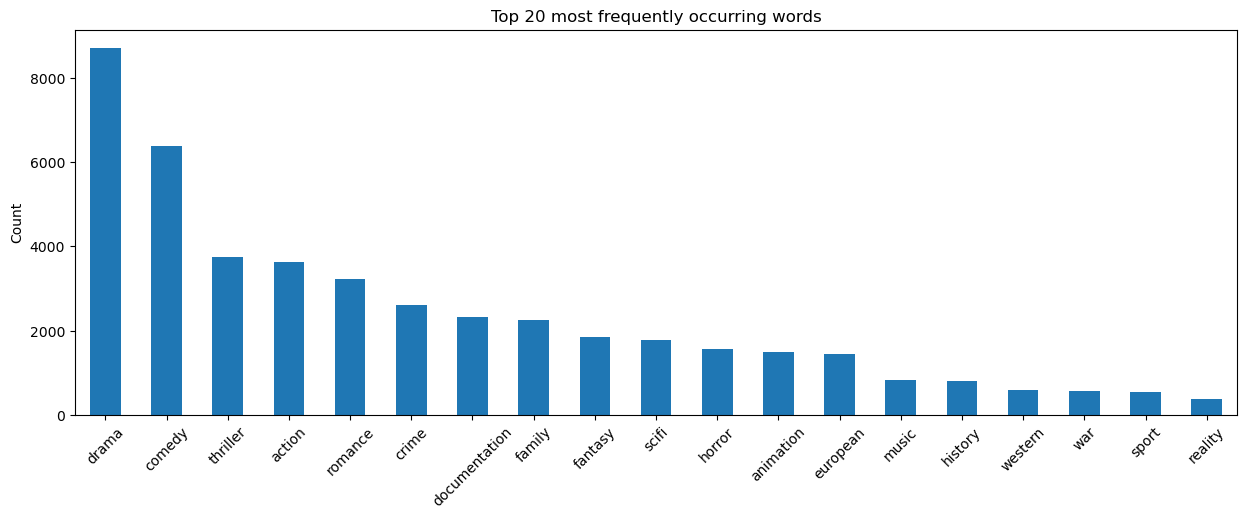

In [199]:
word_counts = pd.DataFrame(
    {"counts": genres_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Because we're working with a lot of text data here, we're going to be plotting this sort of word graph fairly often. I'm just going to write a function to do this.

In [112]:
def plot_top_words(sparse_matrix, vectorizer=bagofwords, num_words=20, output_file=None):
    
    """
    Plots a bar chart of the top `num_words` most frequently occurring words in a given sparse matrix.
    
    Parameters:
    -----------
    sparse_matrix : scipy.sparse matrix
        A sparse matrix representation of the text data, typically created using a CountVectorizer or TfidfVectorizer.
    
    vectorizer : CountVectorizer
        The vectorizer used to create the sparse matrix (must be an instance of sklearn.feature_extraction.text.CountVectorizer).
    
    num_words : int, optional, default: 20
        The number of top words to plot.

    Raises:
    -------
    ValueError
        If the input matrix is not a sparse matrix, the vectorizer is not an instance of CountVectorizer, or the number of words is not a positive integer.

    Returns:
    --------
    None
    """
    
    from scipy.sparse import isspmatrix
    
    if not isspmatrix(sparse_matrix):
        raise ValueError("Input matrix must be a sparse matrix")
    
    if not isinstance(vectorizer, CountVectorizer):
        raise ValueError("Vectorizer must be an instance of CountVectorizer")
    
    if not isinstance(num_words, int) or num_words < 1:
        raise ValueError("Number of words must be a positive integer")

    word_counts = pd.DataFrame(
        {"counts": sparse_matrix.toarray().sum(axis=0)},
        index=vectorizer.get_feature_names_out()
    ).sort_values("counts", ascending=False)

    word_counts.head(num_words).plot(kind="bar", figsize=(15, 5), legend=False)
    plt.title(f"Top {num_words} most frequently occurring words/tokens")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    if output_file:
        plt.savefig(output_file, bbox_inches='tight')
    else:
        plt.show()

In [200]:
word_counts = pd.DataFrame(
    {"counts": genres_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

In [201]:
word_counts

,counts
drama,8700
comedy,6374
thriller,3747
action,3631
romance,3235
crime,2617
documentation,2323
family,2259
fantasy,1860
scifi,1786


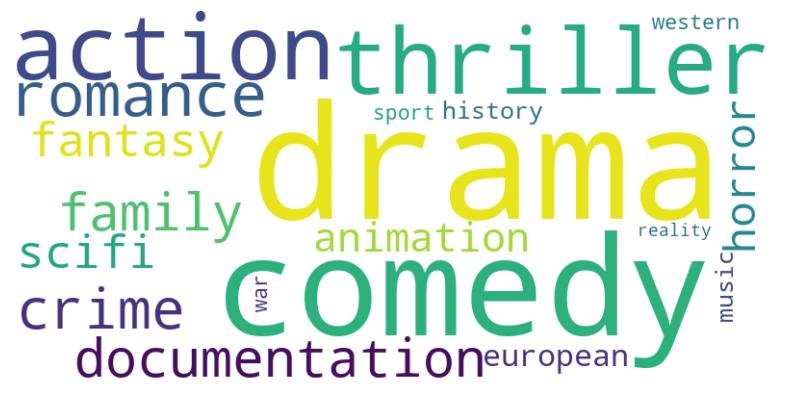

In [203]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'word_counts' DataFrame is already created as mentioned in your question
# Get the top 20 words
top_20_words = word_counts.head(19)

# Create a dictionary of words and their counts
word_dict = top_20_words.to_dict()["counts"]

# Generate a word cloud
wordcloud = WordCloud(background_color='white', width=800, height=400, color_func=).generate_from_frequencies(word_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('genres word cloud1.png')
plt.show()

In [116]:
column_names = [f'genre_{name}' for name in bagofwords.get_feature_names_out()] #To start all column names with genre_

genres_vectorized = pd.DataFrame(columns=column_names, data=genres_transformed.toarray())
display(genres_vectorized)

,genre_action,genre_animation,genre_comedy,genre_crime,genre_documentation,genre_drama,genre_european,genre_family,genre_fantasy,genre_history,genre_horror,genre_music,genre_reality,genre_romance,genre_scifi,genre_sport,genre_thriller,genre_war,genre_western
0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17042,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
17043,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
17044,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
17045,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [117]:
all_titles.head()

,id,title,type,description,release_year,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,platform,Superstars,Allstars,Supporting,Other
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,netflix,1,0,3,32
1,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,netflix,0,0,2,20
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,netflix,0,1,3,42
3,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,netflix,0,2,4,102
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,145,"['action', 'war']","['US', 'GB']",NaN,tt0061578,7.7,71921.0,hbo,0,2,4,102


## `titles` column

Now encoding the titles columns

In [118]:
# 1. Instantiate 
bagofwords = CountVectorizer()

# 2. Fit 
bagofwords.fit(all_titles['title'])

# 3. Transform
titles_transformed = bagofwords.transform(all_titles['title'])
titles_transformed

<17047x13360 sparse matrix of type '<class 'numpy.int64'>'
	with 49338 stored elements in Compressed Sparse Row format>

We're getting too large a dataframe - we need to tune the hyperparameters here to lower the number of words we're getting back.

In [119]:
# 1. Instantiate 
bagofwords = CountVectorizer(stop_words="english")

# 2. Fit 
bagofwords.fit(all_titles['title'])

# 3. Transform
titles_transformed = bagofwords.transform(all_titles['title'])
titles_transformed

<17047x13118 sparse matrix of type '<class 'numpy.int64'>'
	with 36188 stored elements in Compressed Sparse Row format>

Still too large a dataframe, but let's look at what the top 20 words are

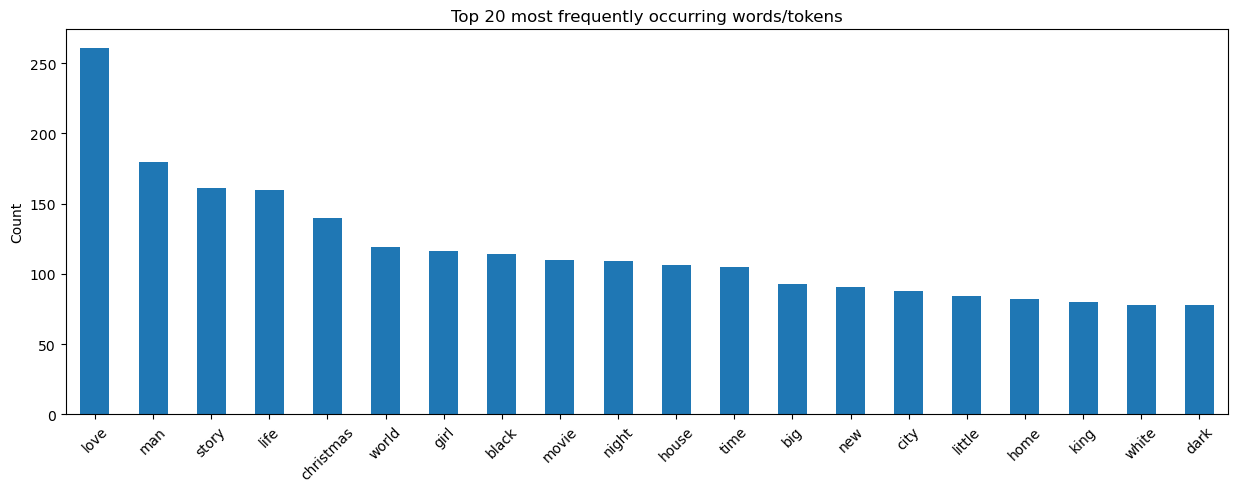

In [120]:
plot_top_words(titles_transformed, bagofwords)

So it's actually giving us back some useful words. Let's prune this a bit by tuning the the min_df parameter to reduce the number of words.

In [121]:
# 1. Instantiate 
bagofwords = CountVectorizer(stop_words="english", min_df = 25)

# 2. Fit 
bagofwords.fit(all_titles['title'])

# 3. Transform
titles_transformed = bagofwords.transform(all_titles['title'])
titles_transformed

<17047x163 sparse matrix of type '<class 'numpy.int64'>'
	with 7782 stored elements in Compressed Sparse Row format>

This is good - a list of 183 words that are in a minimum of 25 content titles. Let's lock in on this as content title features for single words.

I do also want to take a look at if any 2/3 word tokens are common.

In [122]:
# 1. Instantiate 
bagofwords2 = CountVectorizer(stop_words="english", min_df=5, ngram_range=(2,3))

# 2. Fit 
bagofwords2.fit(all_titles['title'])

# 3. Transform
titles_transformed_2 = bagofwords2.transform(all_titles['title'])
titles_transformed_2

<17047x108 sparse matrix of type '<class 'numpy.int64'>'
	with 716 stored elements in Compressed Sparse Row format>

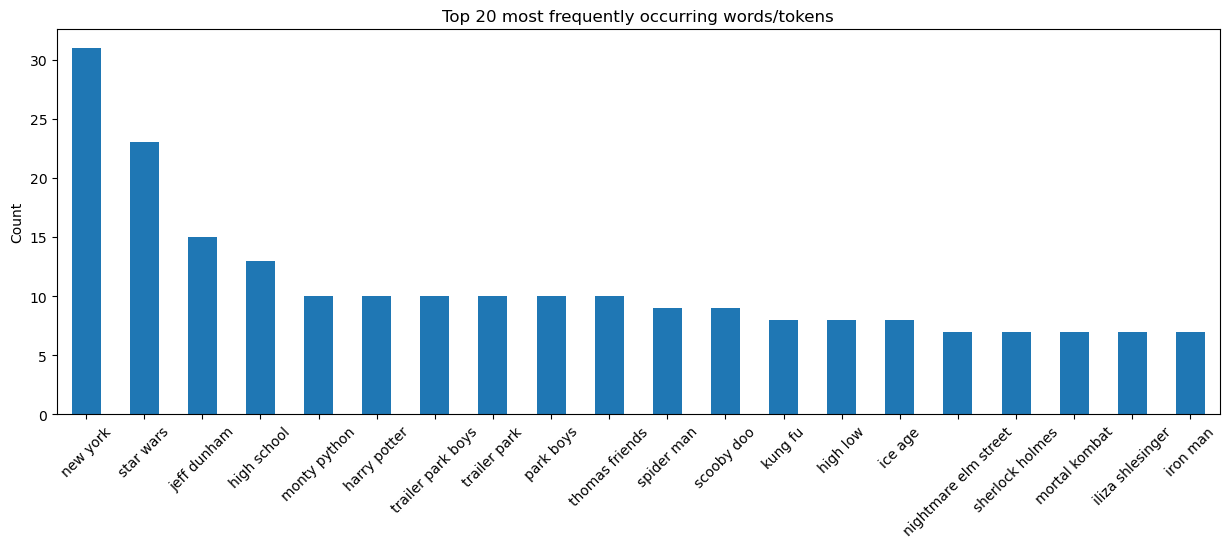

In [123]:
plot_top_words(titles_transformed_2, bagofwords2)

These seem very specific to particular content titles (like Harry Potter, Star Wars). And even the highest one (New York) is only appearing in about 31 movies. It doesn't make sense to include this.

In [124]:
#Creating the data frame for the titles vectorized

column_names = [f'title_{name}' for name in bagofwords.get_feature_names_out()] #To start all column names with title_

titles_vectorized = pd.DataFrame(columns=column_names, data=titles_transformed.toarray())
display(titles_vectorized)

,title_10,title_adventure,title_adventures,title_age,title_america,title_american,title_away,title_baby,title_bad,title_batman,...,title_white,title_wild,title_wolf,title_woman,title_women,title_world,title_year,title_years,title_york,title_young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
all_titles.head()

,id,title,type,description,release_year,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,platform,Superstars,Allstars,Supporting,Other
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,netflix,1,0,3,32
1,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,netflix,0,0,2,20
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,netflix,0,1,3,42
3,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,netflix,0,2,4,102
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,145,"['action', 'war']","['US', 'GB']",NaN,tt0061578,7.7,71921.0,hbo,0,2,4,102


## `description` column

In [126]:
all_titles['description'].isna().sum()

5

In [127]:
all_titles.isna().sum()

id                          0
title                       0
type                        0
description                 5
release_year                0
runtime                     0
genres                      0
production_countries        0
seasons                 13513
imdb_id                     0
imdb_score                  0
imdb_votes                  0
platform                    0
Superstars                  0
Allstars                    0
Supporting                  0
Other                       0
dtype: int64

In [128]:
#Filling all the null values with a stop word so it's easy to remove

all_titles['description'].fillna('the', inplace=True)

In [129]:
# 1. Instantiate 
bagofwords = CountVectorizer(stop_words="english", min_df = 25)

# 2. Fit 
bagofwords.fit(all_titles['description'])

# 3. Transform
descriptions_transformed = bagofwords.transform(all_titles['description'])
descriptions_transformed

<17047x2994 sparse matrix of type '<class 'numpy.int64'>'
	with 271865 stored elements in Compressed Sparse Row format>

3149 is a decent starting point for a number of words extracted, though we will need to narrow it further. Let's see what the top ones are.

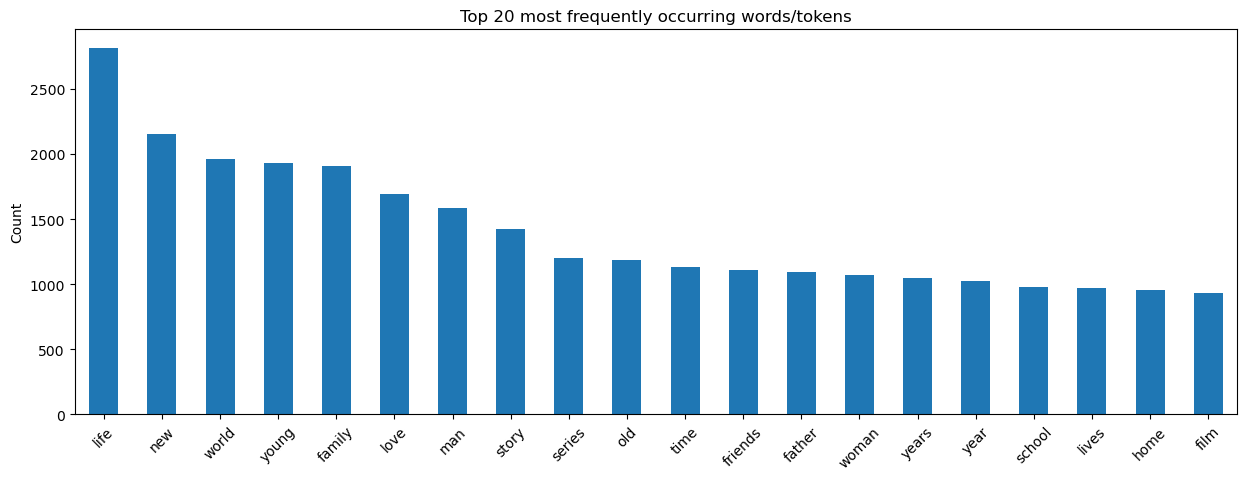

In [130]:
plot_top_words(descriptions_transformed, bagofwords)

Interesting list. We can see 'love' is again amongst the top ones here, just as it was in title. Now I'm going to tune the min_df parameter to reduce the number of words further.

In [131]:
# 1. Instantiate 
bagofwords = CountVectorizer(stop_words="english", min_df = 150)

# 2. Fit 
bagofwords.fit(all_titles['description'])

# 3. Transform
descriptions_transformed = bagofwords.transform(all_titles['description'])
descriptions_transformed

<17047x382 sparse matrix of type '<class 'numpy.int64'>'
	with 127433 stored elements in Compressed Sparse Row format>

This seems like a fair number of single word tokens (413). Let's now take a look at the 2 word ngrams.

In [132]:
# 1. Instantiate 
bagofwords2 = CountVectorizer(stop_words="english", min_df = 25, ngram_range=(2,2))

# 2. Fit 
bagofwords2.fit(all_titles['description'])

# 3. Transform
descriptions_transformed_2 = bagofwords2.transform(all_titles['description'])
descriptions_transformed_2

<17047x183 sparse matrix of type '<class 'numpy.int64'>'
	with 10122 stored elements in Compressed Sparse Row format>

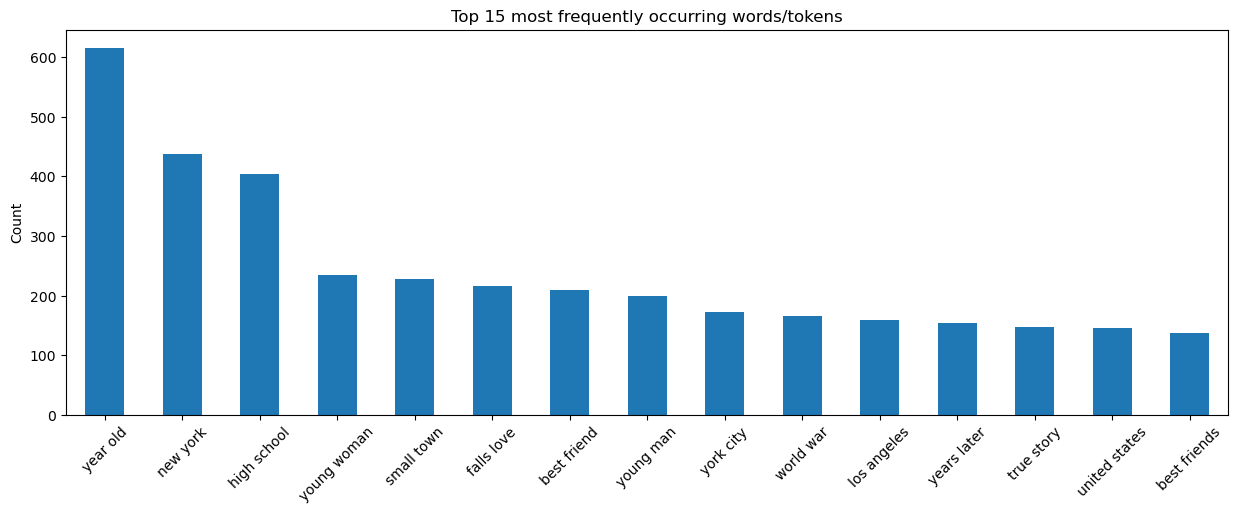

In [133]:
plot_top_words(descriptions_transformed_2, bagofwords2, 15,'bar_chart.png')

Definitely some good tokens in here. 'Small town' jumps out, probably indicating the Hallmark type movies. 'World war' is also interesting, as world war movies are almost a genre unto themselves.

Some redundancy here (like 'new york' and 'york city') but overall this looks like a good list.

In [192]:
word_counts = pd.DataFrame(
    {"counts": descriptions_transformed_2.toarray().sum(axis=0)},
    index=bagofwords2.get_feature_names_out()
).sort_values("counts", ascending=False)

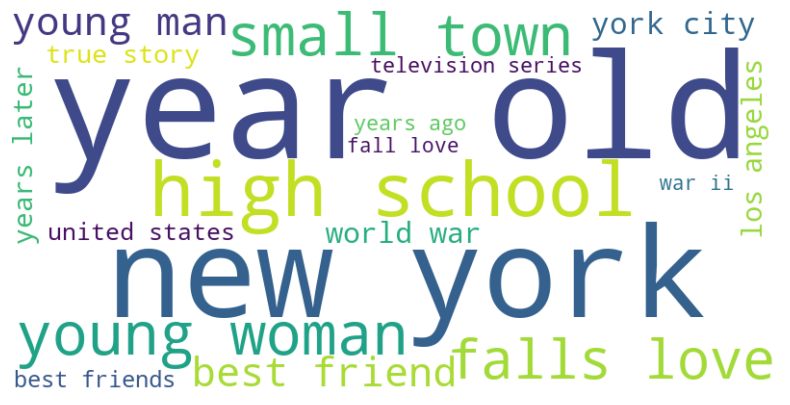

In [193]:
# Assuming 'word_counts' DataFrame is already created as mentioned in your question
# Get the top 20 words
top_20_words = word_counts.head(19)

# Create a dictionary of words and their counts
word_dict = top_20_words.to_dict()["counts"]

# Generate a word cloud
wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(word_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [134]:
#Creating the data frame for the description vectorized

column_names = [f'description_{name}' for name in bagofwords.get_feature_names_out()] #To start all column names with title_

description_vectorized = pd.DataFrame(columns=column_names, data=descriptions_transformed.toarray())
display(description_vectorized)

,description_accident,description_action,description_adventure,description_adventures,description_age,description_agent,description_ago,description_america,description_american,description_ancient,...,description_women,description_work,description_working,description_works,description_world,description_writer,description_year,description_years,description_york,description_young
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17045,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
#Creating the data frame for the description 2 and 3 word ngrams vectorized

column_names = [f'description_{name}' for name in bagofwords2.get_feature_names_out()] #To start all column names with title_

description_vectorized_2 = pd.DataFrame(columns=column_names, data=descriptions_transformed_2.toarray())
display(description_vectorized_2)

,description_10 year,description_10 years,description_11 year,description_12 year,description_13 year,description_14 year,description_15 year,description_16 year,description_17 year,description_19th century,...,description_young couple,description_young daughter,description_young girl,description_young man,description_young men,description_young people,description_young son,description_young woman,description_young women,description_younger brother
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## `seasons` column

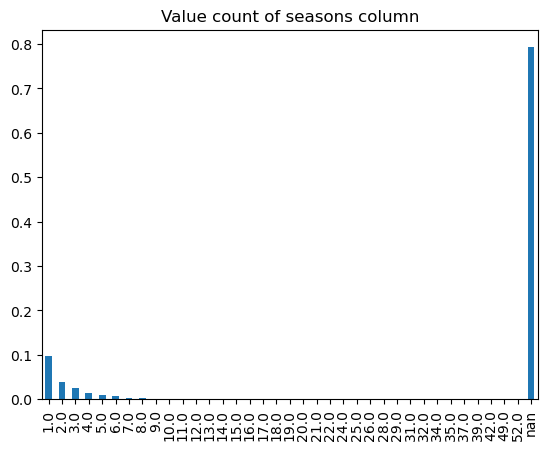

In [136]:
all_titles['seasons'].value_counts(normalize=True, dropna=False).sort_index().plot(kind='bar')
plt.title('Value count of seasons column')
plt.show()

First of all, I can't beliece that some shows have more than 40 seasons. But more importantly, the nan values are for the movies. I'm going to fill this as 0, but then also create another column which indicates whether it's a movie or a TV show.

In [137]:
all_titles['seasons'].fillna(0, inplace=True)

Directly related to this, lets deal with the `type` column next

In [138]:
all_titles.head()

,id,title,type,description,release_year,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,platform,Superstars,Allstars,Supporting,Other
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"['drama', 'crime']",['US'],0.0,tt0075314,8.2,808582.0,netflix,1,0,3,32
1,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,109,"['drama', 'action', 'thriller', 'european']",['US'],0.0,tt0068473,7.7,107673.0,netflix,0,0,2,20
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,91,"['fantasy', 'action', 'comedy']",['GB'],0.0,tt0071853,8.2,534486.0,netflix,0,1,3,42
3,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,150,"['war', 'action']","['GB', 'US']",0.0,tt0061578,7.7,72662.0,netflix,0,2,4,102
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,145,"['action', 'war']","['US', 'GB']",0.0,tt0061578,7.7,71921.0,hbo,0,2,4,102


## `type` column

In [139]:
all_titles_processed = all_titles.copy()

In [140]:
all_titles_processed['type'] = np.where((all_titles_processed['type'] == 'MOVIE'), 1, 0)

In [141]:
all_titles_processed['type'].value_counts(normalize=True)

1    0.792691
0    0.207309
Name: type, dtype: float64

In [142]:
all_titles

,id,title,type,description,release_year,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,platform,Superstars,Allstars,Supporting,Other
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"['drama', 'crime']",['US'],0.0,tt0075314,8.2,808582.0,netflix,1,0,3,32
1,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,109,"['drama', 'action', 'thriller', 'european']",['US'],0.0,tt0068473,7.7,107673.0,netflix,0,0,2,20
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,91,"['fantasy', 'action', 'comedy']",['GB'],0.0,tt0071853,8.2,534486.0,netflix,0,1,3,42
3,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,150,"['war', 'action']","['GB', 'US']",0.0,tt0061578,7.7,72662.0,netflix,0,2,4,102
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,145,"['action', 'war']","['US', 'GB']",0.0,tt0061578,7.7,71921.0,hbo,0,2,4,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17042,tm1049635,Devineni,MOVIE,The film explores the life story of the famous...,2021,122,['drama'],[],0.0,tt14039792,8.4,1188.0,prime,0,0,0,3
17043,tm1078263,Good Boys for Life,MOVIE,"Toddrick Frank, a hustler, living his life unt...",2021,73,"['comedy', 'drama']",['US'],0.0,tt15000128,3.9,50.0,prime,0,0,0,6
17044,tm822572,Gun and a Hotel Bible,MOVIE,"Based on the original play, Gun and a Hotel Bi...",2021,58,['drama'],[],0.0,tt10661500,4.0,142.0,prime,0,0,0,3
17045,tm510327,Lily Is Here,MOVIE,Dallas and heroin have one thing in common: Du...,2021,93,['drama'],['US'],0.0,tt7672388,5.3,20.0,prime,0,0,0,4


In [143]:
all_titles_processed.shape

(17047, 17)

## `production_countries` column

In [144]:
production_countries = all_titles['production_countries']

In [145]:
production_countries = pd.DataFrame(production_countries)



In [146]:
production_countries

,production_countries
0,['US']
1,['US']
2,['GB']
3,"['GB', 'US']"
4,"['US', 'GB']"
...,...
17042,[]
17043,['US']
17044,[]
17045,['US']


In [147]:
#Needed to do the next 3 steps one after the other, it wasn't working without that

production_countries['production_countries'] = \
production_countries['production_countries'].str.replace('[','')

production_countries['production_countries'] = \
production_countries['production_countries'].str.replace(']','')

production_countries['production_countries'] = \
production_countries['production_countries'].str.replace("'",'')

/var/folders/rc/5snd6r290r114krvxnyr5c2m0000gn/T/ipykernel_68715/3678145252.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  production_countries['production_countries'].str.replace('[','')
/var/folders/rc/5snd6r290r114krvxnyr5c2m0000gn/T/ipykernel_68715/3678145252.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  production_countries['production_countries'].str.replace(']','')


In [148]:
production_countries

,production_countries
0,US
1,US
2,GB
3,"GB, US"
4,"US, GB"
...,...
17042,
17043,US
17044,
17045,US


In [149]:
production_countries[production_countries['production_countries'] == '']

,production_countries
29,
1923,
1989,
2450,
2461,
...,...
17031,
17036,
17042,
17044,


We seem to have 726 rows that don't have any production countries, which is interesting. It's not a big number, and we don't have a great way to fill these in, so I'm just going to leave these as is.

In [150]:
# 1. Instantiate 
bagofwords = CountVectorizer()

# 2. Fit 
bagofwords.fit(production_countries['production_countries'])

# 3. Transform
countries_transformed = bagofwords.transform(production_countries['production_countries'])
countries_transformed


<17047x148 sparse matrix of type '<class 'numpy.int64'>'
	with 19405 stored elements in Compressed Sparse Row format>

In [151]:
bagofwords.get_feature_names_out()

array(['ae', 'af', 'al', 'am', 'america', 'an', 'ao', 'aq', 'ar', 'at',
       'au', 'ba', 'bd', 'be', 'bf', 'bg', 'bm', 'bo', 'br', 'bs', 'bt',
       'ca', 'cd', 'ch', 'ci', 'cl', 'cm', 'cn', 'co', 'cr', 'cu', 'cy',
       'cz', 'de', 'dk', 'do', 'dz', 'ec', 'ee', 'eg', 'es', 'et', 'fi',
       'fj', 'fo', 'fr', 'gb', 'ge', 'gh', 'gl', 'gq', 'gr', 'gt', 'hk',
       'hr', 'hu', 'id', 'ie', 'il', 'in', 'io', 'iq', 'ir', 'is', 'it',
       'jm', 'jo', 'jp', 'ke', 'kg', 'kh', 'ki', 'kn', 'kr', 'kw', 'kz',
       'lb', 'lebanon', 'li', 'lk', 'lt', 'lu', 'lv', 'ly', 'ma', 'mc',
       'mn', 'mt', 'mu', 'mw', 'mx', 'my', 'ng', 'nl', 'no', 'np', 'nz',
       'of', 'pa', 'pe', 'pf', 'ph', 'pk', 'pl', 'pr', 'ps', 'pt', 'py',
       'qa', 'ro', 'rs', 'ru', 'rw', 'sa', 'se', 'sg', 'si', 'sk', 'sn',
       'so', 'states', 'su', 'suhh', 'sv', 'sy', 'sz', 'tc', 'th', 'tn',
       'tr', 'tt', 'tw', 'tz', 'ua', 'ug', 'united', 'us', 'uy', 'va',
       've', 'vn', 'xc', 'xg', 'xk', 'xx', 'yu', 'za', 

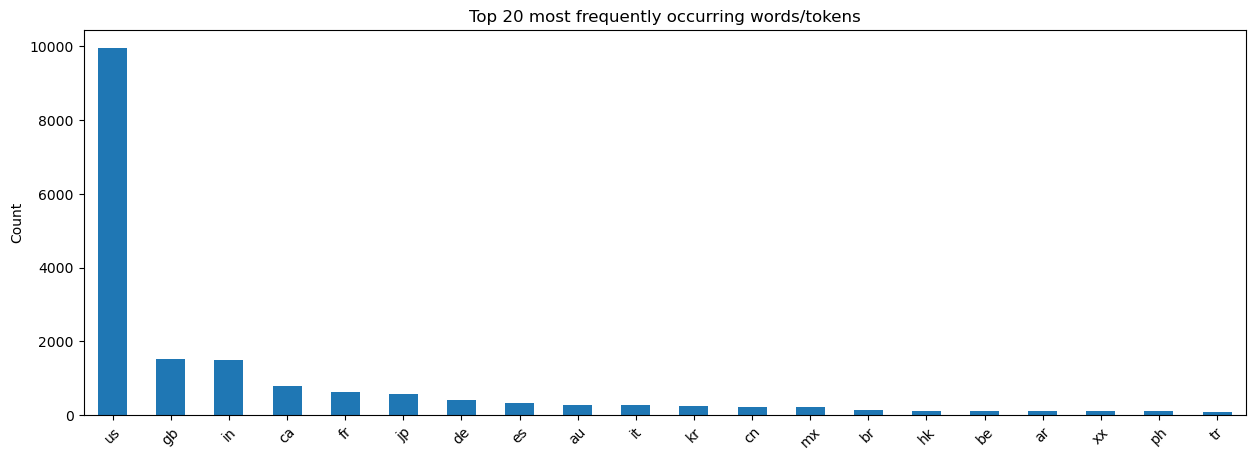

In [152]:
plot_top_words(countries_transformed, bagofwords)

In [153]:
column_names = [f'prod_country_{name}' for name in bagofwords.get_feature_names_out()] #To start all column names with genre_

countries_vectorized = pd.DataFrame(columns=column_names, data=countries_transformed.toarray())
display(countries_vectorized)

,prod_country_ae,prod_country_af,prod_country_al,prod_country_am,prod_country_america,prod_country_an,prod_country_ao,prod_country_aq,prod_country_ar,prod_country_at,...,prod_country_va,prod_country_ve,prod_country_vn,prod_country_xc,prod_country_xg,prod_country_xk,prod_country_xx,prod_country_yu,prod_country_za,prod_country_zw
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
countries_transformed

<17047x148 sparse matrix of type '<class 'numpy.int64'>'
	with 19405 stored elements in Compressed Sparse Row format>

In [155]:
word_counts = pd.DataFrame(
    {"counts": countries_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(50)

,counts
us,9944
gb,1512
in,1482
ca,796
fr,627
jp,570
de,402
es,335
au,279
it,275


There are too many countries here that are not showing up with high frequency, meaning there are hardly any titles that have these as their production countries. I'm going to cap it off at 35, so I'm going to re-run the count vectorizer with a min_df ogf 35.

In [156]:
# 1. Instantiate 
bagofwords = CountVectorizer(min_df=35)

# 2. Fit 
bagofwords.fit(production_countries['production_countries'])

# 3. Transform
countries_transformed = bagofwords.transform(production_countries['production_countries'])
countries_transformed


<17047x39 sparse matrix of type '<class 'numpy.int64'>'
	with 18765 stored elements in Compressed Sparse Row format>

In [157]:
#Creating the data frame for the description vectorized

column_names = [f'prod_country_{name}' for name in bagofwords.get_feature_names_out()] #To start all column names with title_

prod_country_vectorized = pd.DataFrame(columns=column_names, data=countries_transformed.toarray())
display(prod_country_vectorized)

,prod_country_ar,prod_country_au,prod_country_be,prod_country_br,prod_country_ca,prod_country_ch,prod_country_cl,prod_country_cn,prod_country_co,prod_country_cz,...,prod_country_ph,prod_country_pl,prod_country_ru,prod_country_se,prod_country_th,prod_country_tr,prod_country_tw,prod_country_us,prod_country_xx,prod_country_za
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [158]:
all_titles.head()

,id,title,type,description,release_year,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,platform,Superstars,Allstars,Supporting,Other
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"['drama', 'crime']",['US'],0.0,tt0075314,8.2,808582.0,netflix,1,0,3,32
1,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,109,"['drama', 'action', 'thriller', 'european']",['US'],0.0,tt0068473,7.7,107673.0,netflix,0,0,2,20
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,91,"['fantasy', 'action', 'comedy']",['GB'],0.0,tt0071853,8.2,534486.0,netflix,0,1,3,42
3,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,150,"['war', 'action']","['GB', 'US']",0.0,tt0061578,7.7,72662.0,netflix,0,2,4,102
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,145,"['action', 'war']","['US', 'GB']",0.0,tt0061578,7.7,71921.0,hbo,0,2,4,102


## Joining the datasets

### Adding `Description`

In [159]:
all_titles_processed = pd.concat([all_titles_processed, \
                                  description_vectorized, description_vectorized_2], axis=1)

In [160]:
all_titles_processed.isna().sum().sum()

0

In [161]:
all_titles_processed.shape

(17047, 582)

### Adding `Genres`

In [162]:
all_titles_processed = pd.concat([all_titles_processed, \
                                  genres_vectorized], axis=1)

In [163]:
all_titles_processed.isna().sum().sum()

0

### Adding `Production Country`

In [164]:
all_titles_processed = pd.concat([all_titles_processed, \
                                  prod_country_vectorized], axis=1)

In [165]:
all_titles_processed.isna().sum().sum()

0

In [166]:
all_titles.head()

,id,title,type,description,release_year,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,platform,Superstars,Allstars,Supporting,Other
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"['drama', 'crime']",['US'],0.0,tt0075314,8.2,808582.0,netflix,1,0,3,32
1,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,109,"['drama', 'action', 'thriller', 'european']",['US'],0.0,tt0068473,7.7,107673.0,netflix,0,0,2,20
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,91,"['fantasy', 'action', 'comedy']",['GB'],0.0,tt0071853,8.2,534486.0,netflix,0,1,3,42
3,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,150,"['war', 'action']","['GB', 'US']",0.0,tt0061578,7.7,72662.0,netflix,0,2,4,102
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,145,"['action', 'war']","['US', 'GB']",0.0,tt0061578,7.7,71921.0,hbo,0,2,4,102


### Adding `Titles`

In [167]:
all_titles_processed = pd.concat([all_titles_processed, \
                                  titles_vectorized], axis=1)

In [168]:
all_titles_processed.shape

(17047, 803)

In [169]:
all_titles_processed.isna().sum().sum()

0

In [170]:
pd.set_option('display.max_columns', None)

In [171]:
all_titles_processed

,id,title,type,description,release_year,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,platform,Superstars,Allstars,Supporting,Other,description_accident,description_action,description_adventure,description_adventures,description_age,description_agent,description_ago,description_america,description_american,description_ancient,description_angeles,description_army,description_arrives,description_attempt,description_attempts,description_away,description_bad,description_band,description_based,description_battle,description_beautiful,description_begin,description_begins,description_best,description_big,description_black,description_body,description_book,description_boss,description_boy,description_boyfriend,description_break,description_bring,description_brings,description_british,description_brother,description_brothers,description_business,description_called,description_car,description_career,description_case,description_caught,description_century,description_challenges,description_chance,description_change,description_characters,description_child,description_childhood,description_children,description_christmas,description_city,description_class,description_close,description_college,description_come,description_comedian,description_comedy,description_comes,description_comic,description_community,description_company,description_control,description_cop,description_country,description_couple,description_course,description_crew,description_crime,description_criminal,description_dangerous,description_dark,description_daughter,description_day,description_days,description_dead,description_deadly,description_deal,description_death,description_decide,description_decides,description_desperate,description_despite,description_detective,description_determined,description_different,description_director,description_discover,description_discovers,description_doctor,description_documentary,description_does,description_doesn,description_dog,description_don,description_dr,description_drama,description_dream,description_dreams,description_drug,description_early,description_earth,description_end,description_ends,description_escape,description_events,description_evil,description_ex,description_experience,description_explores,description_face,description_fall,description_falls,description_family,description_famous,description_far,description_father,description_female,description_fight,description_film,description_finally,description_finds,description_follow,description_following,description_follows,description_force,description_forced,description_forces,description_forever,description_free,description_friend,description_friends,description_friendship,description_fun,description_future,description_game,description_gang,description_gets,description_getting,description_girl,description_girlfriend,description_girls,description_goes,description_going,description_good,description_government,description_great,description_group,description_hard,description_having,description_head,description_heart,description_help,description_hero,description_high,description_hilarious,description_history,description_hit,description_home,description_hope,description_house,description_human,description_husband,description_identity,description_including,description_inside,description_inspired,description_investigate,description_involved,description_island,description_jack,description_job,description_john,description_join,description_journey,description_just,description_justice,description_kids,description_kill,description_killed,description_killer,description_killing,description_king,description_know,description_known,description_land,description_late,description_later,description_law,description_lead,description_leader,description_leads,description_learn,description_learns,description_leave,description_leaves,description_led,description_left,description_legendary,description_life,description_like,description_little,description_live,description_lives,

### Dropping unrequired columns

In [172]:
all_titles_processed.drop(columns= ['id','title','genres',\
                                               'description','production_countries',\
                                    'imdb_id','platform'],inplace=True)

In [173]:
all_titles_processed

,type,release_year,runtime,seasons,imdb_score,imdb_votes,Superstars,Allstars,Supporting,Other,description_accident,description_action,description_adventure,description_adventures,description_age,description_agent,description_ago,description_america,description_american,description_ancient,description_angeles,description_army,description_arrives,description_attempt,description_attempts,description_away,description_bad,description_band,description_based,description_battle,description_beautiful,description_begin,description_begins,description_best,description_big,description_black,description_body,description_book,description_boss,description_boy,description_boyfriend,description_break,description_bring,description_brings,description_british,description_brother,description_brothers,description_business,description_called,description_car,description_career,description_case,description_caught,description_century,description_challenges,description_chance,description_change,description_characters,description_child,description_childhood,description_children,description_christmas,description_city,description_class,description_close,description_college,description_come,description_comedian,description_comedy,description_comes,description_comic,description_community,description_company,description_control,description_cop,description_country,description_couple,description_course,description_crew,description_crime,description_criminal,description_dangerous,description_dark,description_daughter,description_day,description_days,description_dead,description_deadly,description_deal,description_death,description_decide,description_decides,description_desperate,description_despite,description_detective,description_determined,description_different,description_director,description_discover,description_discovers,description_doctor,description_documentary,description_does,description_doesn,description_dog,description_don,description_dr,description_drama,description_dream,description_dreams,description_drug,description_early,description_earth,description_end,description_ends,description_escape,description_events,description_evil,description_ex,description_experience,description_explores,description_face,description_fall,description_falls,description_family,description_famous,description_far,description_father,description_female,description_fight,description_film,description_finally,description_finds,description_follow,description_following,description_follows,description_force,description_forced,description_forces,description_forever,description_free,description_friend,description_friends,description_friendship,description_fun,description_future,description_game,description_gang,description_gets,description_getting,description_girl,description_girlfriend,description_girls,description_goes,description_going,description_good,description_government,description_great,description_group,description_hard,description_having,description_head,description_heart,description_help,description_hero,description_high,description_hilarious,description_history,description_hit,description_home,description_hope,description_house,description_human,description_husband,description_identity,description_including,description_inside,description_inspired,description_investigate,description_involved,description_island,description_jack,description_job,description_john,description_join,description_journey,description_just,description_justice,description_kids,description_kill,description_killed,description_killer,description_killing,description_king,description_know,description_known,description_land,description_late,description_later,description_law,description_lead,description_leader,description_leads,description_learn,description_learns,description_leave,description_leaves,description_led,description_left,description_legendary,description_life,description_like,description_little,description_live,description_lives,description_living,description_local,description_london,descriptio

In [174]:
all_titles_processed.isna().sum().sum()

0

In [175]:
#all_titles_processed.to_csv('data/ready_for_modeling.csv')

In [206]:
all_titles_processed.shape

(17047, 796)

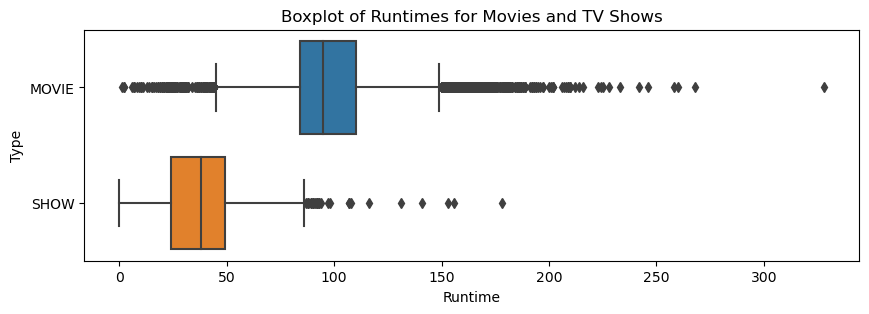

In [176]:
plt.figure(figsize=(10,3))
sns.boxplot(x='runtime', y='type', data=all_titles, orient='h')

# Set plot title and labels
plt.title('Boxplot of Runtimes for Movies and TV Shows')
plt.xlabel('Runtime')
plt.ylabel('Type')

plt.savefig('boxplot_runtimes.png', bbox_inches='tight')

# Display the plot
plt.show()

In [177]:
all_credits.duplicated().sum()

0

In [178]:
all_credits[all_credits.duplicated() == True]

,person_id,id,name,character,role,rank


In [179]:
#This basically shows how many titles have been duplicared. This is because one title can be on multiple platforms - and 221 titles are:
all_credits[all_credits.duplicated() == True]['id'].nunique()

0

In [180]:
#Like this example below
all_titles[all_titles['id'] == 'tm855340']

,id,title,type,description,release_year,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,platform,Superstars,Allstars,Supporting,Other
4992,tm855340,Thalaivii,MOVIE,The biopic charts the life of actor-turned-chi...,2021,153,['drama'],['IN'],0.0,tt10152736,5.9,30621.0,netflix,0,2,2,32
4993,tm855340,Thalaivii,MOVIE,The biopic charts the life of actor-turned-chi...,2021,153,['drama'],['IN'],0.0,tt10152736,5.9,30439.0,prime,0,2,2,32


In [181]:
all_titles[all_titles['id'] == 'tm855340']

,id,title,type,description,release_year,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,platform,Superstars,Allstars,Supporting,Other
4992,tm855340,Thalaivii,MOVIE,The biopic charts the life of actor-turned-chi...,2021,153,['drama'],['IN'],0.0,tt10152736,5.9,30621.0,netflix,0,2,2,32
4993,tm855340,Thalaivii,MOVIE,The biopic charts the life of actor-turned-chi...,2021,153,['drama'],['IN'],0.0,tt10152736,5.9,30439.0,prime,0,2,2,32


In [182]:
#Dropping duplicates due to same title on multiple platforms

all_titles.drop_duplicates(subset=all_titles.columns.difference(['platform']), inplace=True)

#df.drop_duplicates(subset=df.columns.difference(['Description']))

In [183]:
all_credits.duplicated().sum()

0

In [184]:
all_credits.drop_duplicates()

,person_id,id,name,character,role,rank
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR,1
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR,2
2,7064,tm84618,Albert Brooks,Tom,ACTOR,3
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR,4
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR,5
...,...,...,...,...,...,...
124230,1938589,tm1054116,Sangam Shukla,Madhav,ACTOR,1
124231,1938565,tm1054116,Vijay Thakur,Sanjay Thakur,ACTOR,2
124232,728899,tm1054116,Vanya Wellens,Budhiya,ACTOR,3
124233,1938620,tm1054116,Vishwa Bhanu,Gissu,ACTOR,4


In [185]:
all_credits.duplicated().sum()

all_credits.drop_duplicates(inplace=True)

0

In [186]:
all_credits.drop_duplicates(inplace=True)

In [187]:
all_credits.duplicated().sum()

0

In [188]:
len(all_credits)

294841

In [189]:
all_credits.head()

,person_id,id,name,character,role,rank
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR,1
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR,2
2,7064,tm84618,Albert Brooks,Tom,ACTOR,3
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR,4
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR,5


In [190]:
import matplotlib.pyplot as plt

In [191]:
streaming.head()

NameError: name 'streaming' is not defined

In [ ]:
all_titles.head()

In [ ]:
#all_titles.to_csv('data/all_titles.csv')

In [ ]:
#Dropping the rows with null values for imdb score and votes

#all_titles.dropna(subset=['imdb_score', 'imdb_votes'], how='all', inplace=True)

#all_titles[all_titles['imdb_score'].isnull() & all_titles['imdb_votes'].isnull()])
#mosquito_cleaner = mosquito.drop((mosquito[(mosquito.duplicated() == True) & (mosquito['Mosquito number'] != 50)]).index)

In [ ]:
#streaming.to_csv('data/streaming.csv')